<a href="https://colab.research.google.com/github/sabesan1998/NLP/blob/main/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The pipeline used by the trained pipelines typically include a tagger, a lemmatizer, a parser and an entity recognizer.

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp = spacy.blank('en')  #blank pipeline, it only contain tokenizer

In [ ]:
nlp.pipe_names

[]

In [ ]:
pre_nlp = spacy.load('en_core_web_sm') #pre trained pipeline

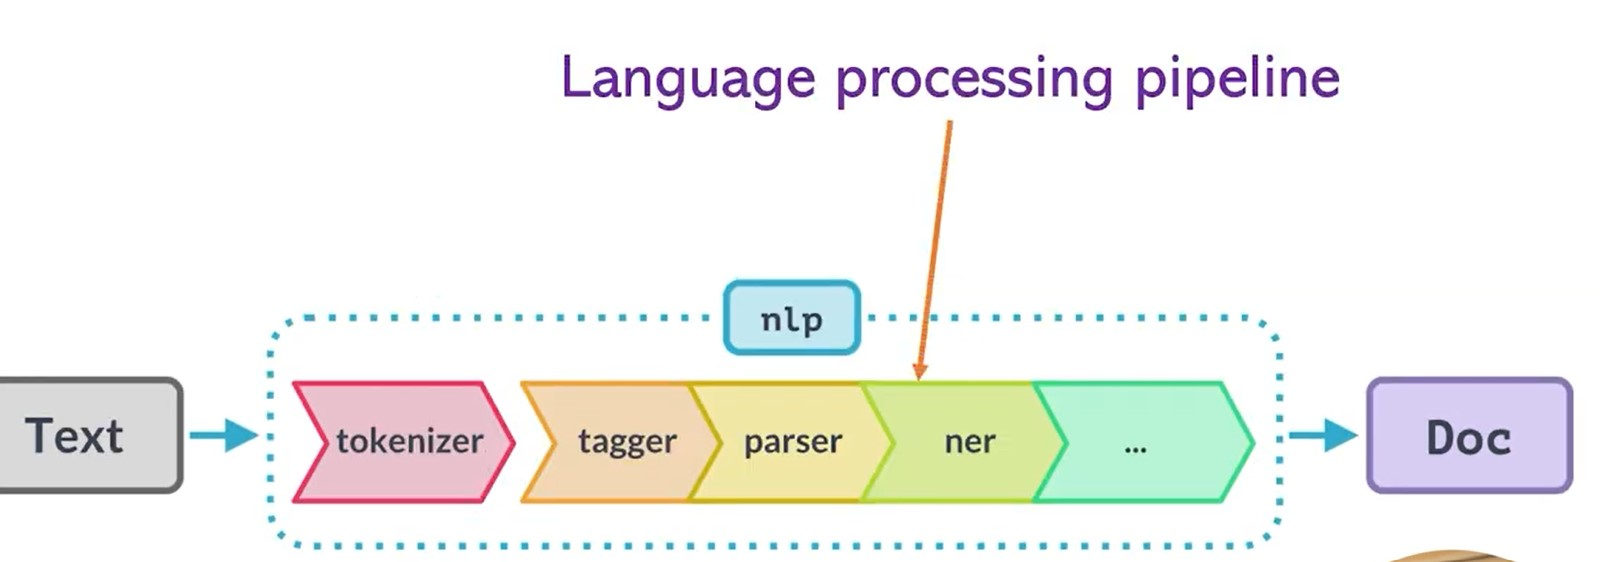

In [ ]:
pre_nlp.pipe_names  #components inside the pipeline

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc = pre_nlp('Captain america is the leader of avengers')

for token in doc:
  print(token,"----",token.pos_,"----",token.lemma_)

Captain ---- PROPN ---- Captain
america ---- PROPN ---- america
is ---- AUX ---- be
the ---- DET ---- the
leader ---- NOUN ---- leader
of ---- ADP ---- of
avengers ---- NOUN ---- avenger


In [ ]:
doc = pre_nlp('Apple is looking at buying U.K. startup for $1 billion')

for entity in doc.ents:
  print(entity," | ",entity.label_," | ",spacy.explain(entity.label_))

Apple  |  ORG  |  Companies, agencies, institutions, etc.
U.K.  |  GPE  |  Countries, cities, states
$1 billion  |  MONEY  |  Monetary values, including unit


In [ ]:
from spacy import displacy

displacy.render(doc,style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Apple\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n is looking at buying \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    U.K.\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n startup for \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    $1 billion\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MONEY<

In [ ]:
source_nlp = spacy.load('en_core_web_sm')         #Addin ner coponent to blank pipeline

nlp = spacy.blank('en')

nlp.add_pipe("ner", source =source_nlp)
nlp.pipe_names

['ner']

In [ ]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for entity in doc.ents:
  print(entity," | ",entity.label_," | ",spacy.explain(entity.label_))

Apple  |  ORG  |  Companies, agencies, institutions, etc.
U.K.  |  GPE  |  Countries, cities, states
$1 billion  |  MONEY  |  Monetary values, including unit
